# import data 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [7]:
labeled_images = pd.read_csv('input/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

/Users/sunyufei/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


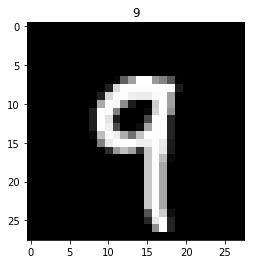

In [14]:
i=10
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([ 666.,   18.,    2.,    3.,    2.,    6.,   14.,   12.,    6.,   55.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

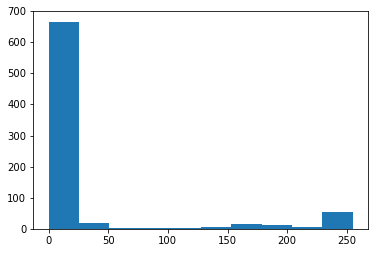

In [10]:
plt.hist(train_images.iloc[i])

## train 

In [15]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.10000000000000001

/Users/sunyufei/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sunyufei/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/sunyufei/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

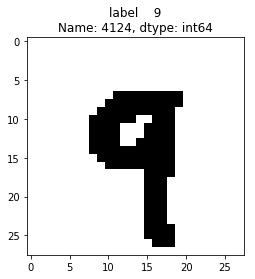

In [17]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 658.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  126.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

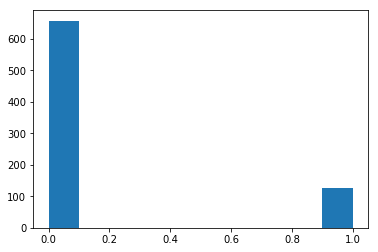

In [18]:
plt.hist(train_images.iloc[i])

In [19]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [20]:
test_data=pd.read_csv('input/test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])

In [21]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

In [22]:
train_labels.values.ravel()

array([7, 6, 3, ..., 4, 7, 9])